<a href="https://colab.research.google.com/github/Randa1989/Demo/blob/main/US%26UK%26FRANCE%26_GERMANY_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
data=files.upload()

Saving salesforcourse-4fe2kehu.csv to salesforcourse-4fe2kehu.csv


In [3]:
df=pd.read_csv(io.StringIO(data['salesforcourse-4fe2kehu.csv'].decode('utf-8')))

In [4]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [6]:
df.shape

(34867, 16)

In [8]:
df=df.drop(["Date"],axis=1)

In [9]:
df.shape

(34867, 15)

In [23]:
df.columns

Index(['index', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country',
       'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')

In [10]:
df.isnull().sum()

index                   0
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [14]:
df = df.dropna()


In [15]:
df.isnull().sum()

index               0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Column1             0
dtype: int64

In [12]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34862    False
34863    False
34864    False
34865    False
34866    False
Length: 34867, dtype: bool

<Axes: >

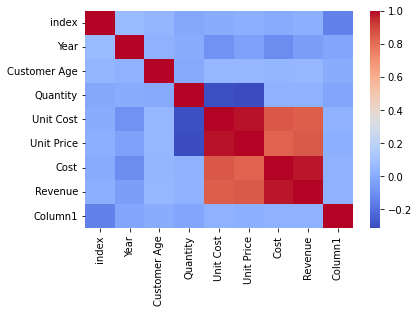

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')

In [17]:
df_by_country = df.groupby('Country')[['Revenue', 'Cost']].sum().reset_index()
print(df_by_country)

          Country   Revenue      Cost
0          France  391566.0  369589.0
1         Germany  245817.0  193353.0
2  United Kingdom  298926.0  284112.0
3   United States  875078.0  805815.0


In [18]:
df_by_country = df.groupby('Country')[['Revenue', 'Cost']].max().reset_index()
print(df_by_country)

          Country  Revenue    Cost
0          France   3681.0  2443.0
1         Germany   3455.0  2443.0
2  United Kingdom   2971.0  2443.0
3   United States   4923.0  3600.0


In [19]:
df_by_country = df.groupby('Country')[['Revenue', 'Cost']].min().reset_index()
print(df_by_country)

          Country  Revenue  Cost
0          France      4.0   4.0
1         Germany      7.0   5.0
2  United Kingdom      4.0   4.0
3   United States      2.0   2.0


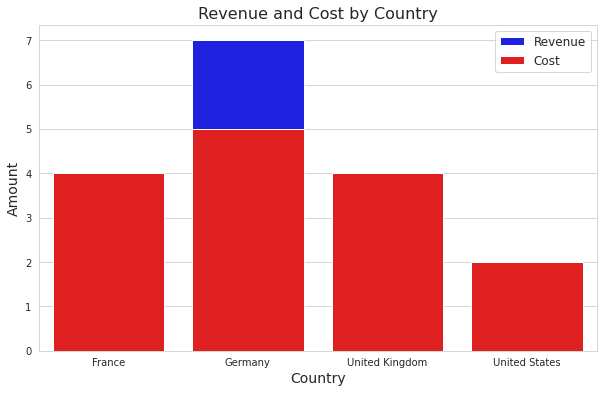

In [20]:
sns.set_style('whitegrid')
sns.set_palette('husl')

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Revenue', data=df_by_country, color='b', label='Revenue')
sns.barplot(x='Country', y='Cost', data=df_by_country, color='r', label='Cost')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Revenue and Cost by Country', fontsize=16)
plt.legend(fontsize=12)
plt.show()

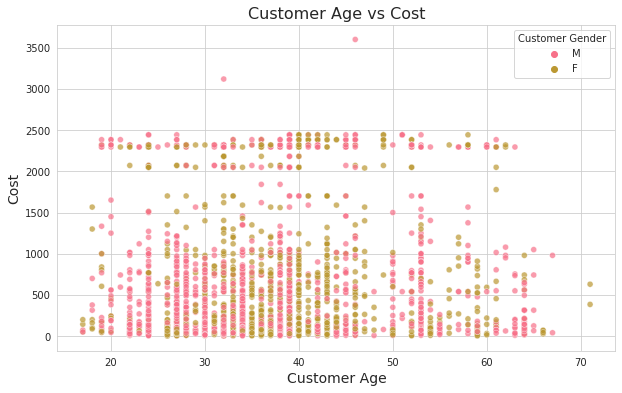

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer Age', y='Cost', data=df, hue='Customer Gender', alpha=0.7)
plt.xlabel('Customer Age', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Customer Age vs Cost', fontsize=16)
plt.show()

        Month  Quantity
0       April     361.0
1      August     448.0
2    December     535.0
3    February     384.0
4     January     498.0
5        July     390.0
6        June     528.0
7       March     377.0
8         May     439.0
9    November     420.0
10    October     370.0
11  September     370.0


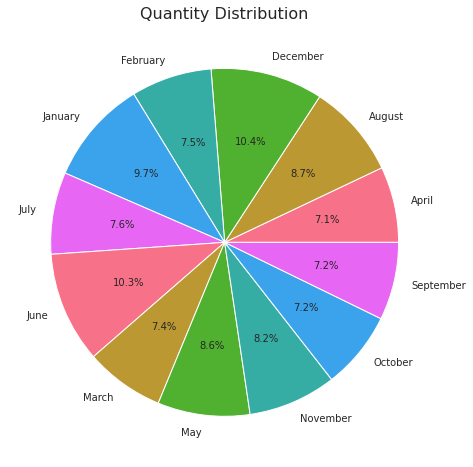

In [24]:
df_by_category = df.groupby('Month')['Quantity'].sum().reset_index()
print(df_by_category)

plt.figure(figsize=(8, 8))
plt.pie(df_by_category['Quantity'], labels=df_by_category['Month'], autopct='%1.1f%%')
plt.title('Quantity Distribution', fontsize=16)
plt.show()

        Month   Revenue
0       April  152432.0
1      August  150808.0
2    December  183515.0
3    February  134673.0
4     January  190283.0
5        July  133127.0
6        June  214374.0
7       March  119513.0
8         May  168138.0
9    November  122323.0
10    October  120589.0
11  September  121612.0


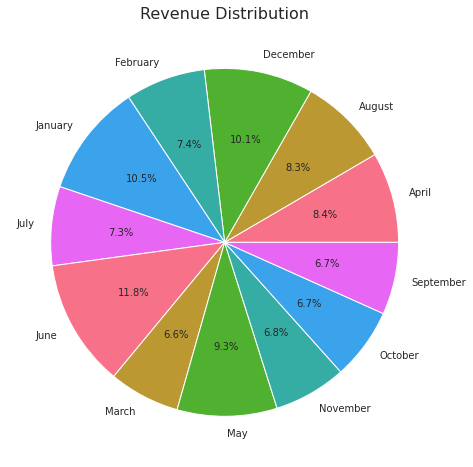

In [26]:
df_by_category = df.groupby('Month')['Revenue'].sum().reset_index()
print(df_by_category)

plt.figure(figsize=(8, 8))
plt.pie(df_by_category['Revenue'], labels=df_by_category['Month'], autopct='%1.1f%%')
plt.title('Revenue Distribution', fontsize=16)
plt.show()

  Product Category  Quantity
0      Accessories    3262.0
1            Bikes    1087.0
2         Clothing     771.0


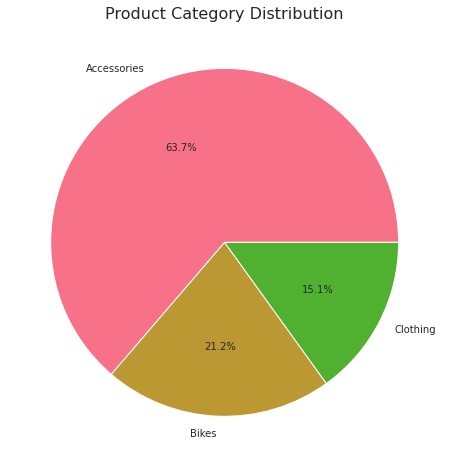

In [22]:
df_by_category = df.groupby('Product Category')['Quantity'].sum().reset_index()
print(df_by_category)

plt.figure(figsize=(8, 8))
plt.pie(df_by_category['Quantity'], labels=df_by_category['Product Category'], autopct='%1.1f%%')
plt.title('Product Category Distribution', fontsize=16)
plt.show()

          Country   Revenue
0          France  391566.0
1         Germany  245817.0
2  United Kingdom  298926.0
3   United States  875078.0


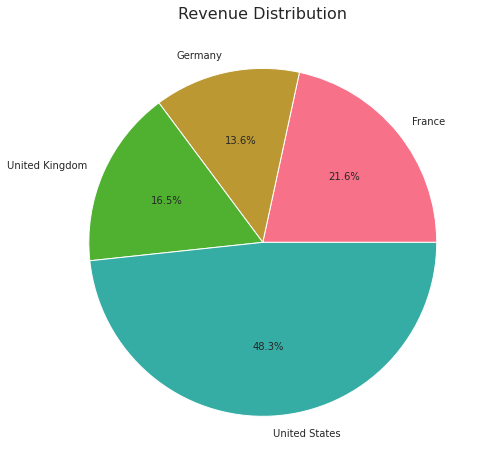

In [28]:
df_by_category = df.groupby('Country')['Revenue'].sum().reset_index()
print(df_by_category)

plt.figure(figsize=(8, 8))
plt.pie(df_by_category['Revenue'], labels=df_by_category['Country'], autopct='%1.1f%%')
plt.title('Revenue Distribution', fontsize=16)
plt.show()

بعد إجراء التحليل التكشفي للبيانات وإنشاء نموذج توقعي لتنبؤ بعدد المبيعات، تمكنا من الحصول على رؤى مهمة حول مجموعة البيانات. لوحظ أن:
 معظم المبيعات حدثت في اشهري يونيوه وديسمبر،
  وأن عملاء الشركات الكبيرة ساهموا بجزء كبير من المبيعات. 
  وان الولايات المتحدة تتصدر قائمة الايرادات 
  وان المانيا في اخر القايمة 
  كما تم التعرف على أن نوع المنتج الأكثر مبيعًا كان من فئة 2.